In [1]:
import pandas as pd 
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_palette('bright')

In [2]:
data = pd.read_csv('loan_data.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.isnull().sum() # to check missing value 

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [4]:
# split the x and y 

x = data.drop(columns=['loan_status'])
y = data['loan_status']

column_names = list(x.columns)

In [5]:
# encode the categorical variable 
cat_cols = list(x.select_dtypes(include='object').columns)

label_encoders = {}

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(x[col])
    x[col] = encoder.transform(x[col])
    label_encoders[col] = encoder

x.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


In [6]:
# splict the data into train and test set 

x_train, x_test, y_train, y_tast = train_test_split(x, y, test_size= 0.2, random_state= 23)



In [7]:
# scale the Xs

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Train the model

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

### Model Evaluation 

In [9]:
# accuracy score 

train_accuracy = accuracy_score(y_true=y_train, y_pred=train_preds)
print(f'train accuracy: {train_accuracy}')
test_accuracy = accuracy_score(y_true=y_tast, y_pred=test_preds)
print(f'test accuracy: {test_accuracy}')

train accuracy: 0.8918611111111111
test accuracy: 0.888


### Confusion Metric

Text(0.5, 1.0, 'test confusion matrix')

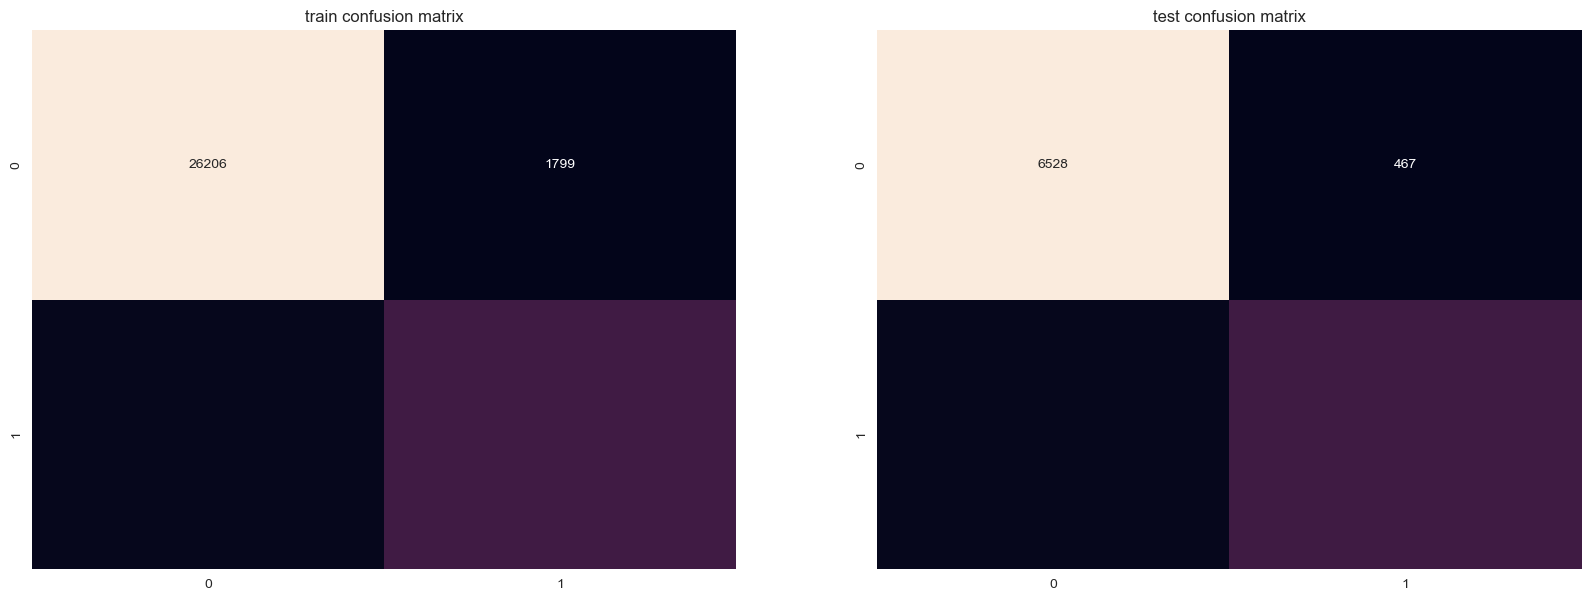

In [10]:
train_confusion = confusion_matrix(y_train, train_preds)
test_confusion = confusion_matrix(y_tast, test_preds)

fig, axes = plt.subplots(1,2, figsize = (20, 7))
sns.heatmap(data=train_confusion, ax = axes[0], cbar=False, annot= True, fmt='d')
sns.heatmap(data=test_confusion, ax = axes[1], cbar=False, annot= True, fmt='d')
axes[0].set_title('train confusion matrix')
axes[1].set_title('test confusion matrix') 

In [11]:
print(f'Train precision for class 1: {precision_score(y_train, train_preds)}')
print(f'Train precision for class 0: {precision_score(y_train, train_preds, pos_label=0)}')

print(f'Train recall for class 1: {recall_score(y_train, train_preds)}')
print(f'Train recall for class 0: {recall_score(y_train, train_preds, pos_label=0)}')

Train precision for class 1: 0.7663636363636364
Train precision for class 0: 0.9260070671378092
Train recall for class 1: 0.7380863039399624
Train recall for class 0: 0.9357614711658633


In [12]:
print(f'Test precision for class 1: {precision_score(y_tast, test_preds)}')
print(f'Test precision for class 0: {precision_score(y_tast, test_preds, pos_label=0)}')

print(f'Test Recall for class 1: {recall_score(y_tast, test_preds)}')
print(f'Test recall for class 0: {recall_score(y_tast, test_preds, pos_label=0)}')

Test precision for class 1: 0.7581563956499223
Test precision for class 0: 0.9234686660065072
Test Recall for class 1: 0.7301745635910224
Test recall for class 0: 0.9332380271622588


In [13]:
print(f'Train f1 for class 1: {f1_score(y_train, train_preds)} ')
print(f'Train f1 for class 0: {f1_score(y_train, train_preds, pos_label=0)}')

print(f'Test f1 for class 1: {f1_score(y_tast, test_preds)}')
print(f'Test f1 for class 0: {f1_score(y_tast, test_preds, pos_label=0)}')

Train f1 for class 1: 0.7519592226823829 
Train f1 for class 0: 0.9308587159222094
Test f1 for class 1: 0.7439024390243902
Test f1 for class 0: 0.9283276450511946


In [14]:
# train classification report 

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     28005
           1       0.77      0.74      0.75      7995

    accuracy                           0.89     36000
   macro avg       0.85      0.84      0.84     36000
weighted avg       0.89      0.89      0.89     36000



In [15]:
print(classification_report(y_tast, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6995
           1       0.76      0.73      0.74      2005

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

